In [1]:
# discretize toxicity columns and check distribution
# or simply check histogram
import pandas as pd
import seaborn as sns
import numpy as np
import torch

In [2]:
import os
os.getcwd()

'/home/hyeryungson/mucoco'

In [3]:
data_dir = './data/toxicity/jigsaw-unintended-bias-in-toxicity-classification/'

## Read data

In [4]:
all_data = pd.read_csv(os.path.join(data_dir, 'all_data_simple.csv'))

In [5]:
# remove rows that have both text and toxicity duplicated
print('nrows before drop duplicates by text column ', all_data.shape[0])
print('nrows after drop duplicates by text column', all_data.drop_duplicates(subset=['comment_text', 'toxicity']).shape[0])
print('nrows to be dropped ', all_data.shape[0] - all_data.drop_duplicates(subset=['comment_text', 'toxicity']).shape[0])

all_data = all_data.drop_duplicates(subset=['comment_text', 'toxicity'])

nrows before drop duplicates by text column  1999516
nrows after drop duplicates by text column 1977803
nrows to be dropped  21713


### Decides what to do with samples that have multiple different toxicity labels

-> # 그냥 깔끔하게 다 삭제하자.

In [6]:
all_data['toxicity_cat']=pd.cut(all_data['toxicity'], np.arange(0, 1.11, 0.1), include_lowest=False, right=False)

In [7]:
# composition of toxicity label before deleting such dirty samples
def portion(x):
    return len(x)/len(all_data)
all_data.groupby('toxicity_cat').agg({'id': [len, portion]})

id          
                  len   portion
toxicity_cat                   
[0.0, 0.1)    1382741  0.699130
[0.1, 0.2)     177893  0.089945
[0.2, 0.3)     188465  0.095290
[0.3, 0.4)       6093  0.003081
[0.4, 0.5)      63108  0.031908
[0.5, 0.6)      79559  0.040226
[0.6, 0.7)      29662  0.014997
[0.7, 0.8)      16204  0.008193
[0.8, 0.9)      23878  0.012073
[0.9, 1.0)       5339  0.002699
[1.0, 1.1)       4861  0.002458

In [8]:
# check if there're samples with duplicated text but with different toxicity label
dup_data = all_data.loc[all_data['comment_text'].duplicated(keep=False)].sort_values(by='comment_text')

In [9]:
eda_dup_data = dup_data.groupby('comment_text')['toxicity'].agg(['min','max','mean']).sort_values(by='max')

In [160]:
eda_dup_data.to_csv('eda_dup_data.csv')

In [161]:
dup_data['toxicity_count'] = dup_data['toxicity_annotator_count'] * dup_data['toxicity']

In [167]:
def calculate_toxicity(x):
    return x['toxicity_count'].sum(), x['toxicity_annotator_count'].sum(),x['toxicity_count'].sum()/x['toxicity_annotator_count'].sum()
dup_data.groupby('comment_text')[['toxicity_count', 'toxicity_annotator_count']].sum()

,toxicity_count,toxicity_annotator_count
comment_text,,
""" Just another reminder that people are generally stupid sheep.""\n Hussein Obama is all the reminder we need that the "" stupid"" vote.",133.0,162
""" Mr. Drumpf's speech before the Asian Pacific Economic Cooperation yesterday, was one of powerful, articulated excellence, and long overdue. It showed great strength, something that past administrations have long lacked, especially Mr. Obama who was very weak on the concerns raised in that speech, and it was well received.""\nHow odd.\nI also saw that speech and was appalled that such an ignorant dilettante represents our country on the world stage.\nI guess we just have different ideas about what America could/should be.",5.0,16
""" Turner had a long list of past driving offenses, and three previous felony convictions.""\n\nSeems to me he was just a loser of a driver doing METH. Plenty of them out there unfortunately. Loser drivers that is.\n\nhttps://ntl.bts.gov/lib/25000/25800/25867/DOT-HS-808-078.pdf",5.0,16
""" new board members holding more diverse views"" is just GOP speak for gormless idiots who donated to the party.",90.0,127
"""""""""national strategy to prevent gender-based violence""""""\n\nApparatchiks saying that through government strategy they can stop a women from raping a man or vice versa\n\nThe end of the Marxist era is coming. This never ending Marxist dogma that government can control how a man or women interacts with their opposite sex is idiotic at best and really really creepy and dangerous at worst.\n\nGovernment is endlessly trying to control every thing in this country.\nYou can't legislate how a person acts.\n\nYour never ending attempt to take over our souls is shameful",9.0,20
...,...,...
…people who denigrate any American's right to protest are nothing more than cretinous unpatriotic boors.,32.0,48
‪Please sign petition for US President Trump to act on Khadr. Trudeau too timid.‬\nSend to your friends \nThanks\n\nhttps://petitions.whitehouse.gov/petition/canada-will-pay-10-million-canadian-terrorist-killer-us-army-hero-sgt-chris-speer-demand-canada-not-do,1.0,10
══════════★●°●°●°●°●°●°●★ \n+ᴍʏ Fʀɪᴇɴᴅ's ᴍᴏᴍ ᴍᴀᴋᴇs $73 ʜᴏᴜʀʟʏ ᴏɴ ᴛʜᴇ ᴄᴏᴍᴘᴜᴛᴇʀ . Sʜᴇ ʜᴀs ʙᴇᴇɴ ᴏᴜᴛ ᴏғ ᴀ ᴊᴏʙ ғᴏʀ 7 ᴍᴏɴᴛʜs ʙᴜᴛ ʟᴀsᴛ ᴍᴏɴᴛʜ ʜᴇʀ ᴄʜᴇᴄᴋ ᴡᴀs $20864 ᴊᴜsᴛ ᴡᴏʀᴋɪɴɢ ᴏɴ ᴛʜᴇ ᴄᴏᴍᴘᴜᴛᴇʀ ғᴏʀ ᴀ ғᴇᴡ ʜᴏᴜʀs. \nclick­­ T­­h­­i­­s­­ L­­i­­n­­k---->> \n\n✬══✬•°•°• ✬ •°•°• ✬ •°•°• ✬══✬ w­w­w­.­9­9­m­o­n­e­y­c­l­a­s­s­.­c­o­m­ᴵᴵᴵᴵᴵᴵᴵᴵᴵᴵᴵᴵᴵᴵᴵᴵᴵᴵᴵᴵᴵᴵᴵᴵ­,1.0,16


In [173]:
def calculate_toxicity(x):
    return x['toxicity_count'].sum()/x['toxicity_annotator_count'].sum()
dup_data_toxicity = dup_data.groupby('comment_text').apply(calculate_toxicity)

In [174]:
eda_dup_data['toxicity'] = dup_data_toxicity

/tmp/ipykernel_1320765/3027762642.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(eda_dup_data['toxicity'], kde=False)


<Axes: xlabel='toxicity'>

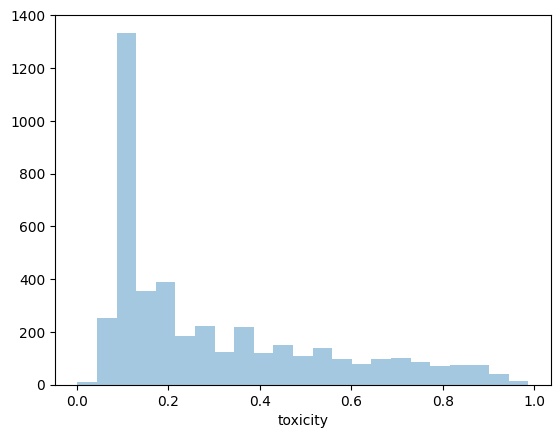

In [176]:
sns.distplot(eda_dup_data['toxicity'], kde=False)

In [ ]:
# 그냥 깔끔하게 다 삭제하자.

### continue

In [10]:
all_data = all_data.loc[~all_data['comment_text'].duplicated(keep=False)]

In [11]:
def portion(x):
    return len(x)/len(all_data)
all_data.groupby('toxicity_cat').agg({'id': [len, portion]})

id          
                  len   portion
toxicity_cat                   
[0.0, 0.1)    1380237  0.701494
[0.1, 0.2)     175909  0.089404
[0.2, 0.3)     186505  0.094790
[0.3, 0.4)       5991  0.003045
[0.4, 0.5)      62370  0.031699
[0.5, 0.6)      78504  0.039899
[0.6, 0.7)      29088  0.014784
[0.7, 0.8)      15841  0.008051
[0.8, 0.9)      23287  0.011835
[0.9, 1.0)       5063  0.002573
[1.0, 1.1)       4774  0.002426

/tmp/ipykernel_401857/936240274.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(all_data['toxicity'], kde=False)


<Axes: xlabel='toxicity'>

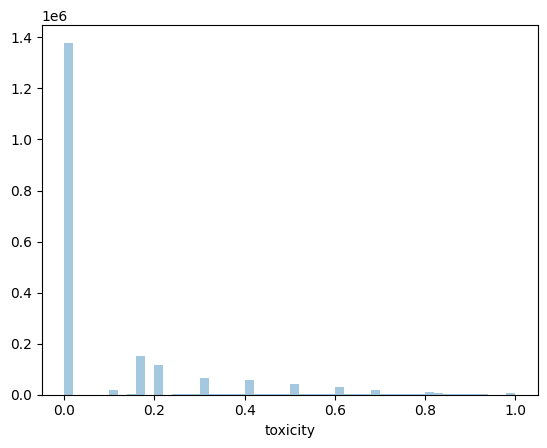

In [12]:
# highly imbalanced.
sns.distplot(all_data['toxicity'], kde=False)

## Set aside test data

In [13]:
test0=pd.read_json('/home/hyeryungson/mucoco/data/toxicity/jigsaw-unintended-bias-in-toxicity-classification/test_0.jsonl', lines=True)
test1=pd.read_json('/home/hyeryungson/mucoco/data/toxicity/jigsaw-unintended-bias-in-toxicity-classification/test_1.jsonl', lines=True)

In [14]:
# double check if any duplicates
len(test0['text'].drop_duplicates()), len(test0),len(test1['text'].drop_duplicates()), len(test1)

(2000, 2000, 1998, 2000)

In [15]:
# test1 has duplicates => drop_duplicates
test1 = test1.drop_duplicates(subset='text')

In [16]:
test0=test0.merge(all_data.rename(columns={'comment_text': 'text'})[['text', 'toxicity']], left_on='text', right_on='text', how='left')
test1=test1.merge(all_data.rename(columns={'comment_text': 'text'})[['text', 'toxicity']], left_on='text', right_on='text', how='left')

In [17]:
test0['toxicity'].value_counts() ## 몇몇 중복 데이터 때문에 이런 경우 존재함

0.0    1989
Name: toxicity, dtype: int64

In [18]:
test1['toxicity'].value_counts().sort_index()

0.500000    522
0.506667      2
0.508197      1
0.509804      1
0.512500      3
           ... 
0.975610      1
0.982369      1
0.982759      1
0.985310      1
1.000000     55
Name: toxicity, Length: 369, dtype: int64

In [19]:
test=pd.concat([test0, test1],axis=0)

In [20]:
test.shape

(3998, 2)

In [23]:
test.to_json('/home/hyeryungson/mucoco/data/toxicity/jigsaw-unintended-bias-in-toxicity-classification/fine-grained/test.jsonl', orient='records', lines=True)

In [24]:
def portion(x):
    return len(x)/len(test)
test['toxicity_cat']=pd.cut(test['toxicity'], np.arange(0, 1.11, 0.1), include_lowest=False, right=False)
test.groupby('toxicity_cat').agg({'text': [len, portion]})

text          
               len   portion
toxicity_cat                
[0.0, 0.1)    1989  0.497499
[0.1, 0.2)       0  0.000000
[0.2, 0.3)       0  0.000000
[0.3, 0.4)       0  0.000000
[0.4, 0.5)       0  0.000000
[0.5, 0.6)     970  0.242621
[0.6, 0.7)     376  0.094047
[0.7, 0.8)     208  0.052026
[0.8, 0.9)     300  0.075038
[0.9, 1.0)      51  0.012756
[1.0, 1.1)      55  0.013757

## Prep for the rest of the steps

In [25]:
# only leave those not used for test data
all_data = all_data.loc[~all_data['comment_text'].isin(test['text']),].copy()

In [26]:
len(all_data)

1963620

In [27]:
def portion(x):
    return len(x)/len(all_data)
all_data.groupby('toxicity_cat').agg({'id': [len, portion]})

id          
                  len   portion
toxicity_cat                   
[0.0, 0.1)    1378248  0.701891
[0.1, 0.2)     175909  0.089584
[0.2, 0.3)     186505  0.094980
[0.3, 0.4)       5991  0.003051
[0.4, 0.5)      62370  0.031763
[0.5, 0.6)      77534  0.039485
[0.6, 0.7)      28712  0.014622
[0.7, 0.8)      15633  0.007961
[0.8, 0.9)      22987  0.011706
[0.9, 1.0)       5012  0.002552
[1.0, 1.1)       4719  0.002403

## Resample data
Sample 4719 samples per bin.
- 4719 : number of samples in the smallest bin

In [28]:
all_data_sample = all_data.groupby('toxicity_cat').sample(4719, random_state=9999)

In [29]:
def portion(x):
    return len(x)/len(all_data_sample)
all_data_sample.groupby('toxicity_cat').agg({'id': [len, portion]})

id          
               len   portion
toxicity_cat                
[0.0, 0.1)    4719  0.090909
[0.1, 0.2)    4719  0.090909
[0.2, 0.3)    4719  0.090909
[0.3, 0.4)    4719  0.090909
[0.4, 0.5)    4719  0.090909
[0.5, 0.6)    4719  0.090909
[0.6, 0.7)    4719  0.090909
[0.7, 0.8)    4719  0.090909
[0.8, 0.9)    4719  0.090909
[0.9, 1.0)    4719  0.090909
[1.0, 1.1)    4719  0.090909

In [30]:
len(all_data_sample)

51909

In [31]:
all_data_sample.to_csv(os.path.join(data_dir, f'all_data_sample_{len(all_data_sample)}.csv'), index=False)

## Split into train, dev, test

In [7]:
from sklearn.model_selection import train_test_split

In [4]:
all_data_sample = pd.read_csv(os.path.join(data_dir, f'all_data_sample_51909.csv'))

In [5]:
all_data_sample = all_data_sample.reset_index(drop=True)

In [8]:
# 9: 1 split
train_data, dev_data = train_test_split(all_data_sample, stratify=all_data_sample['toxicity_cat'], test_size=0.1, random_state=1234)

In [35]:
train_data.shape, dev_data.shape

((46718, 12), (5191, 12))

In [36]:
dev_data[['comment_text', 'toxicity']].rename(columns={'comment_text': 'text'}).to_json(os.path.join(data_dir, 'fine-grained', 'dev.jsonl'), orient='records', lines=True)
train_data[['comment_text', 'toxicity']].rename(columns={'comment_text': 'text'}).to_json(os.path.join(data_dir, 'fine-grained', 'train.jsonl'), orient='records', lines=True)

In [37]:
def portion(x):
    return len(x)/len(train_data)
train_data.groupby('toxicity_cat').agg({'id': [len, portion]})

id          
               len   portion
toxicity_cat                
[0.0, 0.1)    4247  0.090907
[0.1, 0.2)    4247  0.090907
[0.2, 0.3)    4247  0.090907
[0.3, 0.4)    4247  0.090907
[0.4, 0.5)    4247  0.090907
[0.5, 0.6)    4247  0.090907
[0.6, 0.7)    4247  0.090907
[0.7, 0.8)    4247  0.090907
[0.8, 0.9)    4248  0.090929
[0.9, 1.0)    4247  0.090907
[1.0, 1.1)    4247  0.090907

In [38]:
def portion(x):
    return len(x)/len(dev_data)
dev_data.groupby('toxicity_cat').agg({'id': [len, portion]})

id          
              len   portion
toxicity_cat               
[0.0, 0.1)    472  0.090927
[0.1, 0.2)    472  0.090927
[0.2, 0.3)    472  0.090927
[0.3, 0.4)    472  0.090927
[0.4, 0.5)    472  0.090927
[0.5, 0.6)    472  0.090927
[0.6, 0.7)    472  0.090927
[0.7, 0.8)    472  0.090927
[0.8, 0.9)    471  0.090734
[0.9, 1.0)    472  0.090927
[1.0, 1.1)    472  0.090927